🚀 Training started with GridSearchCV...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Training completed.
🏆 Beste hyperparameters: {'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}

📊 Model Evaluatie:
🔹 RMSE (Root Mean Squared Error): 8.17
🔹 MAE (Mean Absolute Error): 2.92
🔹 R² (R-squared): 0.559


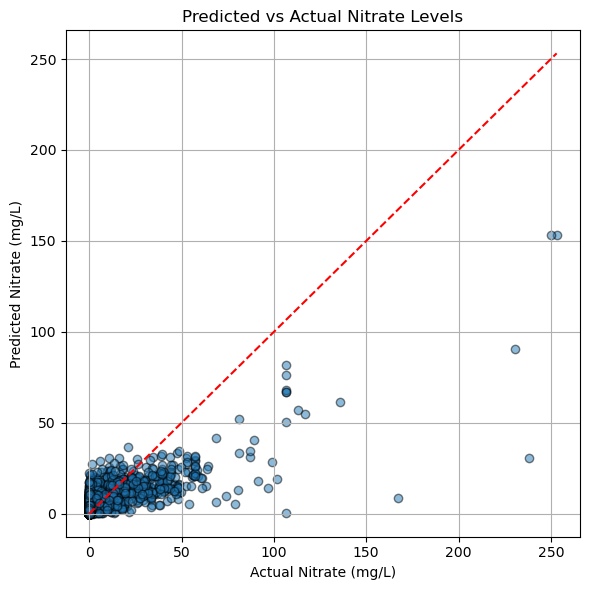

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import necessary scikit-learn modules for preprocessing, modeling, and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the cleaned dataset
data = pd.read_csv('cleaned_data.csv')

# Define columns to remove: metadata, general data, and mineral columns
Meta_data = ['well_no', 'original_wellno', 'well_code', 'well_objectcode', 'network_name','filter_no','x_coord','y_coord','province',
              'local_placename']
 
General_data = ['ground_surface_elevation',
    'depth_topfilter', 'depth_bottomfilter', 'height_wellcasing', 'diam_wellcasing',
    'well_installationyear', 'aquitard_code', 'tritium_code', 'sample_year', 'plan_year',
    'sample_day', 'sample_month', 'O2_5_field', 'T_5_field', 'EC_5_field', 'H_5_field',
    'SH_field', 'HCO3_field', 'Land_use_type']
 
mineral_columns = [
    'aluminium', 'arsenic', 'barium', 'calcium', 'cadmium', 'chloride', 'chromium',
    'copper', 'fluoride', 'iron', 'lead', 'magnesium', 'manganese', 'nickel',
    'potassium', 'sodium', 'so4', 'stronium', 'zinc'
]
 
# Remove unnecessary columns for modeling
df_cleaned = data.drop(columns= Meta_data + General_data + mineral_columns)

# Set the target variable for prediction
target = 'no3n'

# Separate features (X) and target (y)
X = df_cleaned.drop(columns=[target])
y = df_cleaned[target]
# Remove rows where target is missing
X = X[y.notna()]
y = y[y.notna()]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Identify numeric and categorical features for preprocessing
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Create preprocessing pipelines for numeric and categorical data
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Build the full modeling pipeline with preprocessing and a Random Forest regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define hyperparameter grid for Random Forest
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__max_features': ['sqrt', 'log2']
}

# Set up GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

print("Training started with GridSearchCV...")
# Fit the model to the training data
grid_search.fit(X_train, y_train)
print("Training completed.")

# Retrieve the best model from grid search
best_model = grid_search.best_estimator_
print(f"Beste hyperparameters: {grid_search.best_params_}")

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model using RMSE, MAE, and R^2 metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluatie:")
print(f"🔹 RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"🔹 MAE (Mean Absolute Error): {mae:.2f}")
print(f"🔹 R² (R-squared): {r2:.3f}")

# Plot predicted vs actual nitrate values for visual evaluation
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° lijn
plt.xlabel("Actual Nitrate (mg/L)")
plt.ylabel("Predicted Nitrate (mg/L)")
plt.title("Predicted vs Actual Nitrate Levels")
plt.grid(True)
plt.tight_layout()
plt.show()


| Metric   | Meaning                                                                 |
| -------- | ------------------------------------------------------------------------ |
| **RMSE** | Average deviation in the same unit as nitrate (e.g., mg/L)              |
| **MAE**  | Average absolute difference between prediction and actual value         |
| **R²**   | How well the model explains the variance in the data (1 = perfect fit)  |


🚀 Training started with XGBoost GridSearchCV...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ XGBoost training completed.
🏆 Beste XGBoost hyperparameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 10, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}

📊 XGBoost Model Evaluatie:
🔹 RMSE (Root Mean Squared Error): 6.51
🔹 MAE (Mean Absolute Error): 2.00
🔹 R² (R-squared): 0.720


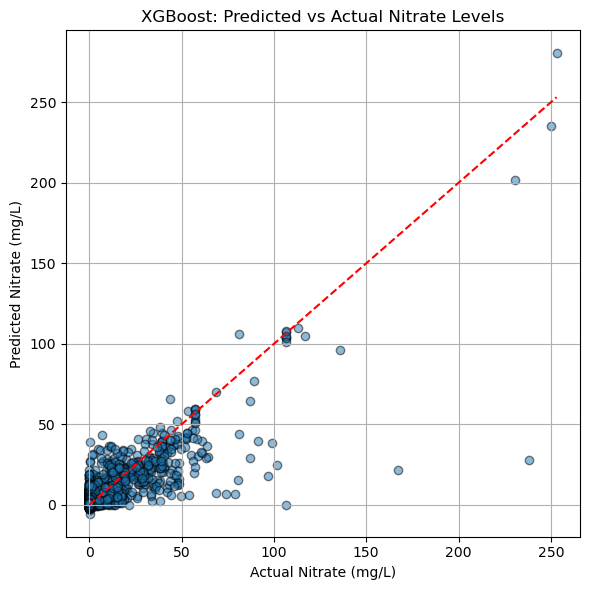

In [ ]:
from xgboost import XGBRegressor

# Build the full modeling pipeline with preprocessing and an XGBoost regressor
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1))
])

# Define hyperparameter grid for XGBoost
xgb_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 6, 10],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__subsample': [0.8, 1.0]
}

# Set up GridSearchCV for hyperparameter tuning with cross-validation
xgb_grid_search = GridSearchCV(
    xgb_pipeline,
    xgb_param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

print("Training started with XGBoost GridSearchCV...")
xgb_grid_search.fit(X_train, y_train)
print("XGBoost training completed.")

# Retrieve the best model from grid search
xgb_best_model = xgb_grid_search.best_estimator_
print(f"Beste XGBoost hyperparameters: {xgb_grid_search.best_params_}")

# Make predictions on the test set
xgb_y_pred = xgb_best_model.predict(X_test)

# Evaluate the model using RMSE, MAE, and R^2 metrics
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("\n XGBoost Model Evaluatie:")
print(f"🔹 RMSE (Root Mean Squared Error): {xgb_rmse:.2f}")
print(f"🔹 MAE (Mean Absolute Error): {xgb_mae:.2f}")
print(f"🔹 R² (R-squared): {xgb_r2:.3f}")

# Plot predicted vs actual nitrate values for visual evaluation
plt.figure(figsize=(6, 6))
plt.scatter(y_test, xgb_y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Nitrate (mg/L)")
plt.ylabel("Predicted Nitrate (mg/L)")
plt.title("XGBoost: Predicted vs Actual Nitrate Levels")
plt.grid(True)
plt.tight_layout()
plt.show()

🚀 Training started with Ridge GridSearchCV...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
✅ Ridge training completed.
🏆 Beste Ridge hyperparameters: {'regressor__alpha': 100.0}

📊 Ridge Model Evaluatie:
🔹 RMSE (Root Mean Squared Error): 12.02
🔹 MAE (Mean Absolute Error): 4.81
🔹 R² (R-squared): 0.047


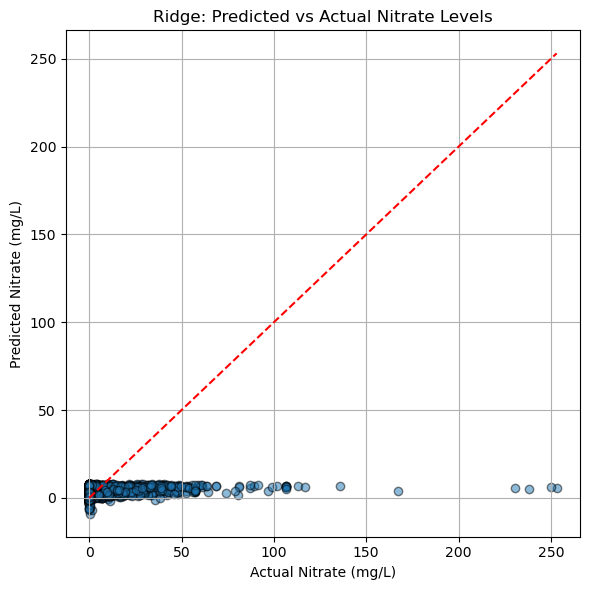

In [ ]:
from sklearn.linear_model import Ridge

# Build the full modeling pipeline with preprocessing and a Ridge regressor
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(random_state=42))
])

# Define hyperparameter grid for Ridge regression
ridge_param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
}

# Set up GridSearchCV for hyperparameter tuning with cross-validation
ridge_grid_search = GridSearchCV(
    ridge_pipeline,
    ridge_param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

print("Training started with Ridge GridSearchCV...")
ridge_grid_search.fit(X_train, y_train)
print(" Ridge training completed.")

# Retrieve the best model from grid search
ridge_best_model = ridge_grid_search.best_estimator_
print(f" Beste Ridge hyperparameters: {ridge_grid_search.best_params_}")

# Make predictions on the test set
ridge_y_pred = ridge_best_model.predict(X_test)

# Evaluate the model using RMSE, MAE, and R^2 metrics
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print("\n Ridge Model Evaluatie:")
print(f"🔹 RMSE (Root Mean Squared Error): {ridge_rmse:.2f}")
print(f"🔹 MAE (Mean Absolute Error): {ridge_mae:.2f}")
print(f"🔹 R² (R-squared): {ridge_r2:.3f}")

# Plot predicted vs actual nitrate values for visual evaluation
plt.figure(figsize=(6, 6))
plt.scatter(y_test, ridge_y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Nitrate (mg/L)")
plt.ylabel("Predicted Nitrate (mg/L)")
plt.title("Ridge: Predicted vs Actual Nitrate Levels")
plt.grid(True)
plt.tight_layout()
plt.show()

🚀 Training started with CatBoost GridSearchCV...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
✅ CatBoost training completed.
🏆 Beste CatBoost hyperparameters: {'regressor__depth': 10, 'regressor__iterations': 200, 'regressor__learning_rate': 0.1}

📊 CatBoost Model Evaluatie:
🔹 RMSE (Root Mean Squared Error): 6.38
🔹 MAE (Mean Absolute Error): 2.26
🔹 R² (R-squared): 0.731


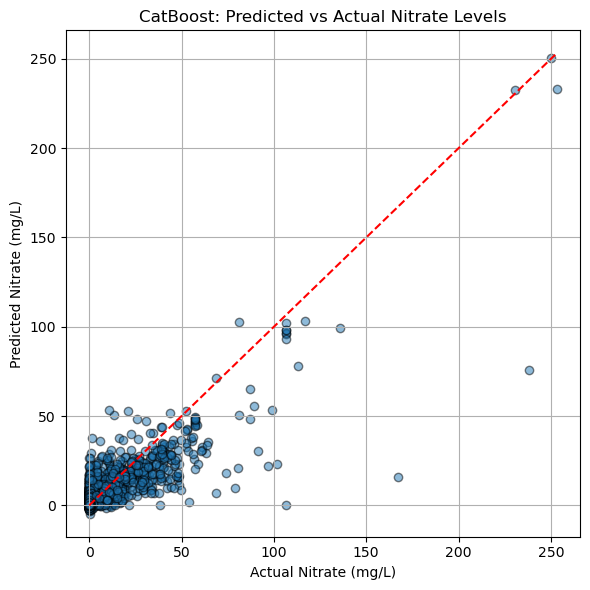

In [ ]:
from catboost import CatBoostRegressor

# Build the full modeling pipeline with preprocessing and a CatBoost regressor
catboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(
        verbose=0,  # suppress CatBoost output
        random_state=42
    ))
])

# Define hyperparameter grid for CatBoost
catboost_param_grid = {
    'regressor__iterations': [100, 200],
    'regressor__depth': [6, 10],
    'regressor__learning_rate': [0.01, 0.1]
}

# Set up GridSearchCV for hyperparameter tuning with cross-validation
catboost_grid_search = GridSearchCV(
    catboost_pipeline,
    catboost_param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

print(" Training started with CatBoost GridSearchCV...")
catboost_grid_search.fit(X_train, y_train)
print(" CatBoost training completed.")

# Retrieve the best model from grid search
catboost_best_model = catboost_grid_search.best_estimator_
print(f" Beste CatBoost hyperparameters: {catboost_grid_search.best_params_}")

# Make predictions on the test set
catboost_y_pred = catboost_best_model.predict(X_test)

# Evaluate the model using RMSE, MAE, and R^2 metrics
catboost_rmse = np.sqrt(mean_squared_error(y_test, catboost_y_pred))
catboost_mae = mean_absolute_error(y_test, catboost_y_pred)
catboost_r2 = r2_score(y_test, catboost_y_pred)

print("\n CatBoost Model Evaluatie:")
print(f"🔹 RMSE (Root Mean Squared Error): {catboost_rmse:.2f}")
print(f"🔹 MAE (Mean Absolute Error): {catboost_mae:.2f}")
print(f"🔹 R² (R-squared): {catboost_r2:.3f}")

# Plot predicted vs actual nitrate values for visual evaluation
plt.figure(figsize=(6, 6))
plt.scatter(y_test, catboost_y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Nitrate (mg/L)")
plt.ylabel("Predicted Nitrate (mg/L)")
plt.title("CatBoost: Predicted vs Actual Nitrate Levels")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Collect results from all models
results = pd.DataFrame({
    "Model": [
        "Random Forest",
        "XGBoost",
        "Ridge Regression",
        "CatBoost",
    ],
    "RMSE": [
        rmse,
        xgb_rmse,
        ridge_rmse,
        catboost_rmse,
    ],
    "MAE": [
        mae,
        xgb_mae,
        ridge_mae,
        catboost_mae,
    ],
    "R2": [
        r2,
        xgb_r2,
        ridge_r2,
        catboost_r2,
    ]
})

display(results)

,Model,RMSE,MAE,R2
0,Random Forest,8.174849,2.922076,0.558749
1,XGBoost,6.510645,2.002878,0.720118
2,Ridge Regression,12.015069,4.814392,0.046811
3,CatBoost,6.384563,2.262385,0.730853


# Prediction visual

In [11]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# Create input widgets with better blank handling
input_widgets = {}
for col in X_train.columns:
    # Calculate statistics for tooltips
    if col in numeric_features:
        col_min = X_train[col].min()
        col_max = X_train[col].max()
        col_median = X_train[col].median()
        tooltip = f"Range: {col_min:.2f}-{col_max:.2f}, Median: {col_median:.2f}"
       
        # Numeric input with placeholder for blank
        input_widgets[col] = widgets.Text(
            value='',
            placeholder=f'Enter value: {col_median:.2f})',
            description=f'{col}:',
            style={'description_width': '150px'},
            layout=widgets.Layout(width='300px'),
            tooltip=tooltip
        )
    else:  # Categorical features
        categories = X_train[col].dropna().unique().tolist()
        tooltip = f"Options: {', '.join(categories)}"
       
        input_widgets[col] = widgets.Dropdown(
            options=['(blank)'] + categories,
            value='(blank)',
            description=f'{col}:',
            style={'description_width': '150px'},
            layout=widgets.Layout(width='300px'),
            tooltip=tooltip
        )
 
# Create prediction button
predict_btn = widgets.Button(
    description='Predict Nitrate Level',
    button_style='success',
    icon='flask',
    layout=widgets.Layout(width='300px', height='40px')
)
 
# Create clear button
clear_btn = widgets.Button(
    description='Clear All',
    button_style='warning',
    icon='broom',
    layout=widgets.Layout(width='150px', height='40px')
)
 
# Create output areas
output = widgets.Output()
prediction_display = widgets.HTML(value="<div class='prediction-placeholder'>Enter parameters and click Predict</div>")
 
# Header with instructions
header = widgets.HTML(
    value="<div style='background:#f8f9fa; border-radius:10px; padding:20px; margin-bottom:20px;'>"
          "<h1 style='color:#1a3d66; margin-top:0;'>🚰 Groundwater Nitrate Prediction</h1>"
          "<p>Enter water quality parameters below. <b>Leave fields blank if unknown</b>.</p>"
          "<p style='font-size:13px; color:#6c757d;'><i>Hover over field names for value ranges and options</i></p>"
          "</div>"
)
 
# Function to clear all inputs
def clear_inputs(b):
    for widget in input_widgets.values():
        if isinstance(widget, widgets.Text):
            widget.value = ''
        elif isinstance(widget, widgets.Dropdown):
            widget.value = '(blank)'
 
# Function to estimate prediction confidence
def estimate_confidence(provided_features, feature_importances):
    """Estimate prediction confidence based on provided features"""
    if len(provided_features) == 0:
        return 0.0
   
    # Calculate percentage of important features covered
    top_features = feature_importances.sort_values(ascending=False).index[:10]
    coverage = sum(1 for feat in top_features if feat in provided_features) / len(top_features)
   
    # Calculate percentage of total importance covered
    total_importance = feature_importances.sum()
    provided_importance = feature_importances[feature_importances.index.isin(provided_features)].sum()
   
    # Combine metrics
    confidence = min(1.0, (coverage * 0.6 + (provided_importance / total_importance) * 0.4))
    return confidence
 
# Function to create confidence visualization
def create_confidence_display(confidence):
    """Create a simple visual confidence indicator"""
    # Determine color and text based on confidence
    if confidence > 0.7:
        color = "#4CAF50"
        label = "High Confidence"
    elif confidence > 0.4:
        color = "#FFC107"
        label = "Medium Confidence"
    else:
        color = "#F44336"
        label = "Low Confidence"
   
    # Create HTML display
    return widgets.HTML(
        value=f"""
        <div style='margin:20px 0;'>
            <div style='display:flex; align-items:center; margin-bottom:5px;'>
                <span style='width:100px;'>Confidence:</span>
                <div style='flex-grow:1; height:20px; background:#e0e0e0; border-radius:10px; overflow:hidden;'>
                    <div style='height:100%; width:{confidence*100}%; background:{color};'></div>
                </div>
                <span style='margin-left:10px; font-weight:bold;'>{confidence*100:.0f}%</span>
            </div>
            <div style='text-align:center; color:{color}; font-weight:bold;'>{label}</div>
        </div>
        """
    )
 
# Function to handle prediction
def on_predict_clicked(b):
    with output:
        clear_output()
        try:
            # Collect values from widgets
            input_values = {}
            provided_features = []
            missing_features = []
           
            for col, widget in input_widgets.items():
                # Get value based on widget type
                if isinstance(widget, widgets.Text):
                    value = widget.value.strip()
                    if value == '':
                        missing_features.append(col)
                        continue
                    try:
                        value = float(value)
                    except ValueError:
                        print(f"⚠️ Invalid number: {col} = '{widget.value}'")
                        continue
                else:  # Dropdown
                    if widget.value == '(blank)':
                        missing_features.append(col)
                        continue
                    value = widget.value
               
                input_values[col] = value
                provided_features.append(col)
           
            # Create DataFrame with all columns
            input_df = pd.DataFrame([input_values], columns=X_train.columns)
           
            # Predict
            prediction = best_model.predict(input_df)[0]
           
            # Calculate confidence
            try:
                # Get feature importances
                feature_importances = pd.Series(
                    best_model.named_steps['regressor'].feature_importances_,
                    index=best_model.named_steps['preprocessor'].get_feature_names_out()
                )
               
                # Group importances by original features
                orig_importances = {}
                for feat in X_train.columns:
                    # Find all components for this feature
                    components = [f for f in feature_importances.index
                                 if f.startswith(f'num__{feat}') or f.startswith(f'cat__{feat}')]
                    orig_importances[feat] = feature_importances[components].sum()
               
                feature_importances = pd.Series(orig_importances)
                confidence = estimate_confidence(provided_features, feature_importances)
            except Exception as e:
                # Fallback confidence estimation
                confidence = len(provided_features) / len(X_train.columns)
           
            # Interpret prediction
            if prediction < 5:
                risk = "Low Risk"
                color = "#4CAF50"
                icon = "✅"
            elif prediction < 20:
                risk = "Moderate Risk"
                color = "#FFC107"
                icon = "⚠️"
            else:
                risk = "High Risk"
                color = "#F44336"
                icon = "❗"
           
            # Format results
            prediction_display.value = f"""
            <div style='border-left:5px solid {color}; padding-left:15px; margin:20px 0;'>
                <div style='display:flex; align-items:center;'>
                    <span style='font-size:36px; margin-right:15px;'>{icon}</span>
                    <div>
                        <div style='font-size:24px; color:{color}; font-weight:bold;'>{prediction:.2f} mg/L NO₃-N</div>
                        <div style='font-size:18px;'>{risk}</div>
                    </div>
                </div>
                <div style='margin-top:10px; font-size:14px; color:#6c757d;'>
                    EU drinking water limit: 50 mg/L
                </div>
            </div>
            """
           
            # Create confidence display
            confidence_display = create_confidence_display(confidence)
           
            # Create feature info display
            features_html = [
                "<div style='margin-top:20px; padding:15px; background:#f8f9fa; border-radius:5px;'>",
                "<h3 style='margin-top:0;'>Input Summary</h3>"
            ]
           
            if provided_features:
                features_html.append("<p><b>Provided parameters:</b></p>")
                features_html.append("<ul style='column-count:2;'>")
                for feat in provided_features:
                    value = input_values[feat]
                    features_html.append(f"<li>{feat}: <code>{value}</code></li>")
                features_html.append("</ul>")
           
            if missing_features:
                features_html.append(f"<p><b>Estimated parameters ({len(missing_features)}):</b></p>")
                features_html.append("<div style='color:#6c757d;'>")
                features_html.append(", ".join(missing_features))
                features_html.append("</div>")
           
            features_html.append("</div>")
           
            # Display all elements
            display(confidence_display)
            display(widgets.HTML("".join(features_html)))
           
        except Exception as e:
            prediction_display.value = f"""
            <div style='color:#F44336; padding:15px; border:1px solid #F44336; border-radius:5px;'>
                <h3>⚠️ Prediction Error</h3>
                <p>{str(e)}</p>
                <p>Please check your inputs and try again.</p>
            </div>
            """
 
# Link buttons to functions
predict_btn.on_click(on_predict_clicked)
clear_btn.on_click(clear_inputs)
 
# Arrange layout
input_container = widgets.VBox(
    [input_widgets[col] for col in X_train.columns],
    layout=widgets.Layout(
        padding='10px',
        max_height='400px',
        overflow_y='auto',
        border='1px solid #dee2e6',
        border_radius='5px'
    )
)
 
# Button container
button_container = widgets.HBox(
    [predict_btn, clear_btn],
    layout=widgets.Layout(justify_content='center', margin='20px 0')
)
 
# Results container
results_container = widgets.VBox(
    [prediction_display, output],
    layout=widgets.Layout(
        padding='20px',
        border='1px solid #dee2e6',
        border_radius='5px',
        margin='20px 0'
    )
)
 
# Style for the prediction placeholder
display(widgets.HTML("""
<style>
    .prediction-placeholder {
        padding: 20px;
        text-align: center;
        color: #6c757d;
        font-style: italic;
        border: 2px dashed #dee2e6;
        border-radius: 5px;
    }
</style>
"""))
 
# Assemble interface
dashboard = widgets.VBox([
    header,
    widgets.HTML("<h2>📋 Parameters</h2>"),
    input_container,
    button_container,
    widgets.HTML("<h2>📊 Prediction Results</h2>"),
    results_container
], layout=widgets.Layout(width='800px', padding='20px'))
 
display(dashboard)
 

HTML(value='\n<style>\n    .prediction-placeholder {\n        padding: 20px;\n        text-align: center;\n   …